In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [11]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_data = pd.read_csv(train_url)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [12]:
#Fill NaN in Age with 19 if they don't have any family members
# Assuming that they would be young adult people traveling alone
#Fill NaN in Age with 17 if their family members are 2 or more 
for i,age in enumerate(train_data["Age"]):
    num_fam_members = train_data["Parch"][i] + train_data["SibSp"][i]
    if num_fam_members == 0: 
        train_data["Age"] = train_data["Age"].fillna(19)
    elif num_fam_members >= 2:
        train_data["Age"] = train_data["Age"].fillna(17)


third_mode = train_data.loc[train_data.Pclass == 3].Fare.mode().iloc[0]
#print "start", train_data.loc[:, ["PassengerId",'Pclass', 'Fare']].loc[train_data.Pclass == 3].loc[train_data.Fare == 0]
#dex = train_data.loc[:, ["PassengerId",'Pclass', 'Fare']].loc[train_data.Pclass == 3].loc[train_data.Fare == 0].values
dex = train_data.loc[:, "PassengerId"].loc[train_data.Pclass == 3].loc[train_data.Fare == 0].values
#print "dex:", dex

for curr_dex in dex:
    curr_dex = curr_dex - 1
    train_data.set_value(curr_dex, 'Fare', third_mode)

#print "end", train_data.loc[:, ["PassengerId",'Pclass', 'Fare']].loc[train_data.Pclass == 3].loc[train_data.Fare == third_mode]


def convert_agena(df):
    
    for i,age in enumerate(df["Age"]):
        num_fam_members = df["Parch"][i] + df["SibSp"][i]
        if num_fam_members == 0: 
            df["Age"] = df["Age"].fillna(19)
        elif num_fam_members >= 2:
            df["Age"] = df["Age"].fillna(17)
            
    return None

def convert_minfares_mode(df, pclass):
    
    mode = df.loc[df.Pclass == pclass].Fare.mode().iloc[0]
    #print mode
    #dex = df.loc[:, ['PassengerId']].loc[df.Pclass == pclass].loc[df.Fare == 0].values
    dex = df.index.values
    #print dex
    
    for curr_dex in dex:
        #curr_dex = curr_dex - 1
        df.set_value(curr_dex, 'Fare', mode)
    
    return None

def convert_sex(df):
    
    df.loc[df.Sex == 'female', 'Sex'] = 1
    df.loc[df.Sex == 'male', 'Sex'] = 0
    
    return None
    


convert_minfares_mode(train_data, 2)
convert_minfares_mode(train_data, 1)



#This does not work:
    #train_data.loc[:, ["PassengerId",'Pclass', 'Fare']].loc[train_data.Pclass == 3].loc[train_data.Fare == 0, "Fare"] = third_mode
#for pid in my_frame["PassengerId"]:
    #my_list.append(pid)
    #train_data.loc[train_data.PassengerId == pid, "Fare"] = third_mode

#could have used passengerID, which the value is the same as the index
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,13,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,13,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,13,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,13,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,13,NaN,S


In [10]:
train_data["Child"] = float("NaN")
train_data.loc[train_data.Age < 18, "Child"] = 1
train_data.loc[train_data.Age >= 18, "Child"] = 0
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,13,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,13,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,13,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,13,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,13,NaN,S,0


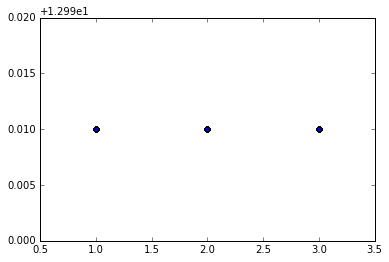

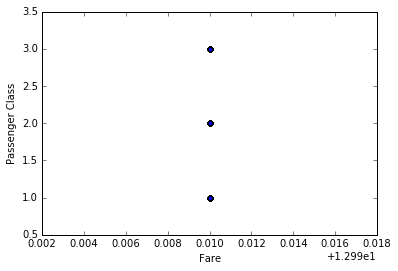

In [13]:
%matplotlib inline
fare = np.asarray(train_data['Fare'])
pclass = np.asarray(train_data['Pclass'])

plt.scatter(pclass, fare)
plt.show()

plt.scatter(fare, pclass)
plt.xlabel("Fare")
plt.ylabel("Passenger Class")
plt.show()

0    8.05
dtype: float64

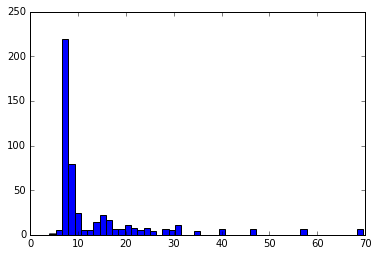

In [111]:
%matplotlib inline
third_class = train_data[train_data.Pclass == 3]
third_fare = np.asarray(third_class['Fare'])
#print 'THIRD'
plt.hist(third_fare, bins=50)

#third_class.describe()
#third_class
third_class['Fare'].mode()
#third_class.fillna(df.mode().iloc[0])

SECOND


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.000000,184,173.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2,29.877630,0.402174,0.380435,21.086096
std,250.852161,0.500623,0,14.001077,0.601633,0.690963,12.952730
min,10.000000,0.000000,2,0.670000,0.000000,0.000000,10.500000
25%,234.500000,0.000000,2,23.000000,0.000000,0.000000,13.000000
50%,435.500000,0.000000,2,29.000000,0.000000,0.000000,14.250000
75%,668.000000,1.000000,2,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2,70.000000,3.000000,3.000000,73.500000


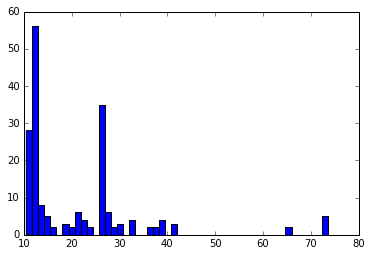

In [121]:
second_class = train_data[train_data.Pclass == 2]
second_fare = np.asarray(second_class['Fare'])
print 'SECOND'
plt.hist(second_fare, bins=50)


second_class.describe()
#second_class['Fare'].mode()

FIRST


0    26.55
dtype: float64

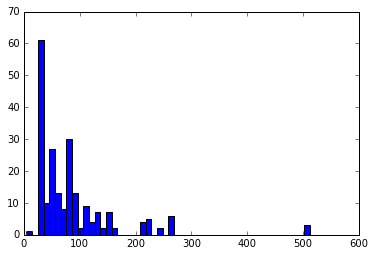

In [107]:

first_class = train_data[train_data.Pclass == 1]
first_fare = np.asarray(first_class['Fare'])
print 'FIRST'
plt.hist(first_fare, bins=50)

first_class.describe()
first_class['Fare'].mode()

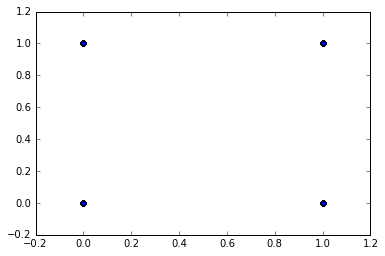

In [146]:
train_data.isnull().any()

train["Survived"].value_counts(normalize = True)


#train_data.describe()
survive = np.asarray(train_data.loc[:, 'Survived'].loc[train_data.Pclass == 3])
sex = np.asarray(train_data.loc[:, "Sex"].loc[train_data.Pclass == 3].loc[:, 'Survived' == 1])
fare = np.asarray(train_data['Fare'])
pclass = np.asarray(train_data['Pclass'])
%matplotlib inline
plt.hist(sex, survive)
plt.show()

In [156]:
train_data.loc[:, 'Survived'].loc[train_data.Sex == 1].value_counts(normalize=True)

train_data.loc[:, 'Survived'].loc[train_data.Sex == 0].value_counts(normalize=True)

0    0.811092
1    0.188908
dtype: float64

In [158]:
# Create the target and features numpy arrays: target, features_one
target = train_data["Survived"].values
features_one = train_data[["Pclass", "Sex", "Age", "Fare"]].values

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# Look at the importance and score of the included features
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

#Are there more males in the upper class?
#write functions to do all the data handling and cleaning for the test



[ 0.12307742  0.31388404  0.2552471   0.30779144]
0.978675645342


In [168]:
# Create a new array with the added features: features_two
features_two = train_data[["Pclass","Age","Sex","Fare", "SibSp", "Parch"]].values

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 5
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.feature_importances_)
print(my_tree_two.score(features_two, target))

[ 0.19001678  0.10593835  0.55964146  0.09528401  0.03998021  0.00913918]
0.841750841751


In [191]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_two, target)

# Print the score of the fitted random forest
print(my_forest.feature_importances_)
print(my_forest.score(features_two, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test_data[["Pclass","Age","Sex","Fare", "SibSp", "Parch"]].values
pred_forest = my_forest.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test_data["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

[ 0.10626223  0.22502609  0.32708779  0.24363056  0.05489006  0.04310328]
0.94051627385
     Survived
1           0
2           1
3           1
4           1
5           0
6           0
7           0
8           0
9           0
10          1
11          1
12          1
13          0
14          0
15          0
16          1
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          1
25          0
26          0
27          0
28          0
29          0
30          0
..        ...
862         0
863         1
864         0
865         0
866         1
867         1
868         1
869         0
870         1
871         0
872         1
873         1
874         0
875         1
876         0
877         0
878         0
879         0
880         1
881         1
882         0
883         0
884         0
885         0
886         0
887         0
888         1
889         0
890         1
891         0

[891 rows x 1 columns]
(891, 1)


In [192]:
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_data = pd.read_csv(train_url)
convert_agena(test_data)
convert_minfares_mode(test_data, 1)
convert_minfares_mode(test_data, 2)
convert_minfares_mode(test_data, 3)
convert_sex(test_data)